TO-DO: new vector from mfcc

In [1]:
import json
import math
import numpy as np
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 

In [3]:
DATA_PATH = "Data\\data.json"
GENRE_LIST = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [32]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    # Convert mfcc to vector
    flatten_X = []
    for i in range(len(X)):
        flatten_X.append(X[i].flatten())

    np_X = np.array(flatten_X)
    
    print("X len =",len(np_X))
    print("y len =",len(np_X))
    print("Data succesfully loaded!")

    return  np_X, y

In [66]:
X, y = load_data(DATA_PATH)

X len = 9996
y len = 9996
Data succesfully loaded!
np_X: [[-212.68553162  100.71859741  -12.32228661 ...   -9.90297604
    12.21512985   -9.50313663]
 [-147.24847412   88.57117462  -15.3050518  ...  -18.68417549
    15.80086899   -5.29636002]
 [-101.02148438  111.37915039  -10.29000664 ...  -13.63085938
     0.27712443   14.87944412]
 ...
 [-261.35720825  178.09820557  -35.17987061 ...   -2.75734162
    -0.85792649   -7.47333002]
 [ -94.36488342   94.31558228  -49.3952713  ...    4.7312007
     8.66473866   -4.34622049]
 [-226.80410767  154.23376465    0.33657706 ...   13.76632214
    20.21653748   -9.65754604]]


In [100]:
print(X.shape)

(9996, 1690)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [102]:
# nsamples_test, nx_test, ny_test = X_test.shape
# d2_X_test = X_test.reshape((nsamples_test,nx_test*ny_test))
# print(X_test.shape)
# print(d2_X_test.shape)

# nsamples_train, nx_train, ny_train = X_train.shape
# d2_X_train = X_train.reshape((nsamples_train,nx_train*ny_train))
# print(X_train.shape)
# print(d2_X_train.shape)

In [103]:
# scaling 
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

In [114]:
print(int(len(y_test)/len(GENRE_LIST)))
k = math.isqrt(int(len(y_test)/len(GENRE_LIST)))
print(k)

299
17


In [116]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_classifier.fit(X_train, y_train)

knn_pred = knn_classifier.predict(X_test)

In [117]:
print('Accuracy : ' ,accuracy_score(y_test, knn_pred)*100, '%' )

Accuracy :  50.15005001667222 %


In [118]:
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print('KNN confusion_matrix:')
print(knn_confusion_matrix)

KNN confusion_matrix:
[[163  19   2   1   0  46  36   1   0  20]
 [  0 285   1   0   0   9   0   0   0   0]
 [  4  65  66   3   1 126   7   1   0  41]
 [  3  10  12  70   3 101  25   1   0  56]
 [  5   5  20  26  55  76  62  17   0  36]
 [  0  50   2   0   0 249   1   0   0   2]
 [  3   0   2   0   0   6 270   0   0  23]
 [  0  14  29  13   0  78   0 110   0  43]
 [  3  16  15  12   5 137   9   8  70  35]
 [  3  20  13   5   1  81  22   3   0 166]]


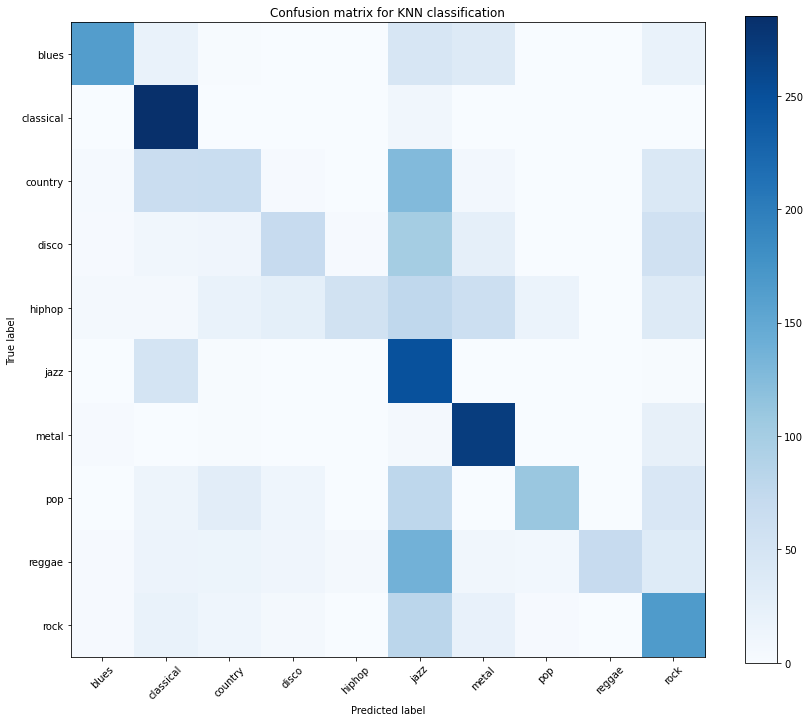

In [122]:
plt.figure(figsize=(12, 10))
plt.imshow(knn_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix for KNN classification")
plt.colorbar()
tick_marks = np.arange(len(GENRE_LIST))
plt.xticks(tick_marks, GENRE_LIST, rotation = 45)
plt.yticks(tick_marks, GENRE_LIST)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Number of songs for each genre: [288 295 314 281 302 304 304 287 310 314]


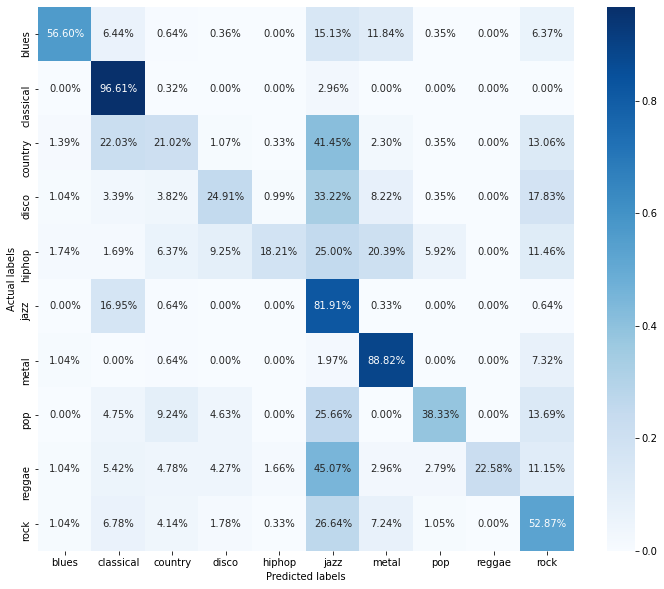

In [125]:
fig, ax = plt.subplots(figsize=(12,10), facecolor='white')
sn.heatmap(knn_confusion_matrix/np.sum(knn_confusion_matrix, axis = 1), annot=True, fmt='.2%', xticklabels=GENRE_LIST, yticklabels=GENRE_LIST, cmap='Blues')
ax.set(xlabel="Predicted labels", ylabel="Actual labels")
print("Number of songs for each genre:", np.sum(knn_confusion_matrix, axis = 1))